In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan = pd.read_csv('D:\\KT\\Practice Datasets\\EDA Case study\\application_data.csv')
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 200)
loan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Plotting a graph for columns having null values > 50%

Text(0.5, 1.0, 'Variables with missing values')

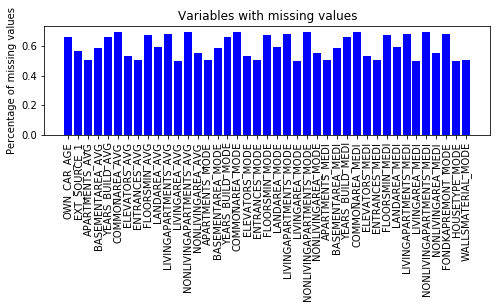

In [3]:
columns_with_missing_values = loan.columns[loan.isnull().any()]
loan[columns_with_missing_values].isnull().sum()
labels = [] 
# To hold the count of missing values for each variable 
valuecount = [] 
# To hold the percentage of missing values for each variable
percentcount = [] 
for col in columns_with_missing_values:
    val = loan[col].isnull().sum()/loan.shape[0]
    if val > 0.5:
        labels.append(col)
        percentcount.append(loan[col].isnull().sum()/loan.shape[0])
ind = np.arange(len(labels))
fig, (ax2) = plt.subplots(1,1,figsize=(8,2))
rects = ax2.bar(ind, np.array(percentcount), color='blue')
ax2.set_xticks(ind)
ax2.set_xticklabels(labels, rotation=90)
ax2.set_ylabel("Percentage of missing values")
ax2.set_title("Variables with missing values")

#### Taking the columns only which are relevant to the given problem 

In [4]:
cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_1']

#### Adding those columns to a new dataframe called loan_new

In [5]:
loan = loan.loc[:,cols]
loan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,NaN,Laborers,1.0,2,2,Business Entity Type 3,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,1.0,0.083037
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,NaN,Core staff,2.0,1,1,School,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.311267
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,26.0,Laborers,1.0,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,NaN,Laborers,2.0,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,NaN,Core staff,1.0,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,NaN,Sales staff,1.0,1,1,Services,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,0.145570
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,NaN,NaN,1.0,2,2,XNA,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,NaN,Managers,1.0,3,3,School,block of flats,Panel,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,1.0,0.0,1.0,0.744026
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,NaN,Laborers,2.0,2,2,Business Entity Type 1,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,NaN


##### Adding a new column years_employed derived from the metric DAYS_EMPLOYED for easy analysis

In [6]:
loan['years_employed'] = loan['DAYS_EMPLOYED'].apply(lambda x:abs(x//365)
                                                         if loan['DAYS_EMPLOYED'].notnull().all() else x)

##### Adding a new column years_birth derived from the metric DAYS_BIRTH for easy analysis

In [7]:
loan['years_birth'] = loan['DAYS_BIRTH'].apply(lambda x:abs(x//365)
                                                         if loan['DAYS_BIRTH'].notnull().all() else x)

##### Adding a new column Defaulting_Prob derived from metric TARGET and replacing 0 & 1 into Defualter and Non-Defaulter for easy analysis

In [8]:
loan['Defaulting_Prob'] = loan['TARGET']
loan['Defaulting_Prob'].replace({0: "Non-Defaulter", 1: "Defaulter"}, inplace=True)

### Identifying the datatype of column if it's categorical or continuous

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Verifying the datatype loaded by Pandas is correct or not - if a column has more than 40 unique values, it can be considered as continuous 

### All categorical data shoukd load as continuous
### All continuous data should load as int/float

In [17]:
loan.nunique().sort_values()

Defaulting_Prob                     2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
HOUSETYPE_MODE                      3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WALLSMATERIAL_MODE                  7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_S

### Here we observe there are few categorical data
### which are loaded as int - we need to convert the data type to object 

In [18]:
loan['TARGET'] = loan['TARGET'].astype(str)
loan['REGION_RATING_CLIENT'] = loan['REGION_RATING_CLIENT'].astype(str)
loan['DEF_60_CNT_SOCIAL_CIRCLE'] = loan['DEF_60_CNT_SOCIAL_CIRCLE'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_MON'] = loan['AMT_REQ_CREDIT_BUREAU_MON'].astype(str)
loan['OBS_30_CNT_SOCIAL_CIRCLE'] = loan['OBS_30_CNT_SOCIAL_CIRCLE'].astype(str)
loan['SK_ID_CURR'] = loan['SK_ID_CURR'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_HOUR'] = loan['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_DAY'] = loan['AMT_REQ_CREDIT_BUREAU_DAY'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_MON'] = loan['AMT_REQ_CREDIT_BUREAU_MON'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_QRT'] = loan['AMT_REQ_CREDIT_BUREAU_QRT'].astype(str)
loan['AMT_REQ_CREDIT_BUREAU_YEAR'] = loan['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(str)

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  object 
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### If there is any missing values, we can use this to handle them

In [20]:
loan['AMT_INCOME_TOTAL'] = pd.to_numeric(loan['AMT_INCOME_TOTAL'], errors = 'coerce')
loan['DAYS_EMPLOYED'] = pd.to_numeric(loan['AMT_INCOME_TOTAL'], errors = 'coerce')
loan['OBS_30_CNT_SOCIAL_CIRCLE'] = pd.to_numeric(loan['OBS_30_CNT_SOCIAL_CIRCLE'], errors = 'coerce')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  object 
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Let's analyse the columns where there are missing values

In [21]:
loan.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
HOUSETYPE_MODE                 154297
WALLSMATERIA

#### We can find the null values %age using this

In [22]:
print(loan.shape)
round(100*(loan.isnull().sum()/len(loan.index)),2) 

(307511, 41)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
ORGANIZATION_TYPE               0.00
HOUSETYPE_MODE                 50.18
WALLSMATERIAL_MODE             50.84
O

### For columns having very high percentage of missing values such as OWN_CAR_AGE, HOUSETYPE_MODE, WALLSMATERIAL_MODE we can drop those columns as it may give wrong analysis if we impute values on columns which affect the loan

In [23]:
loan  = loan.drop(["OWN_CAR_AGE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE","OCCUPATION_TYPE"], axis=1)

### For columns having very low percentage of missing values such as AMT_GOODS_PRICE we can ignore the missing values

### For few other columns having missing values we can impute values for the missing columns

### Finding Missing Values and handling them

#### Finding the rows with null values in AMT_GOODS_PRICE column

In [10]:
loan[loan['AMT_GOODS_PRICE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth,Defaulting_Prob
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,NaN,Core staff,4.0,2,2,Kindergarten,block of flats,"Stone, brick",2.0,1.0,2.0,1.0,-2011.0,NaN,NaN,NaN,NaN,NaN,0.358509,2,28,Non-Defaulter
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,NaN,Private service staff,2.0,2,2,Business Entity Type 3,block of flats,Panel,0.0,0.0,0.0,0.0,-476.0,0.0,0.0,0.0,0.0,2.0,0.505609,9,33,Non-Defaulter
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,NaN,Accountants,2.0,2,2,Trade: type 7,NaN,NaN,1.0,1.0,1.0,0.0,-643.0,NaN,NaN,NaN,NaN,NaN,0.706945,8,27,Non-Defaulter
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,NaN,Managers,3.0,1,1,Government,block of flats,"Stone, brick",1.0,0.0,1.0,0.0,-1292.0,0.0,0.0,0.0,0.0,0.0,NaN,3,31,Non-Defaulter
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,NaN,Security staff,1.0,1,1,Construction,NaN,NaN,1.0,0.0,1.0,0.0,-159.0,0.0,0.0,0.0,0.0,3.0,0.477288,6,28,Non-Defaulter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.025164,-11313,-1470,NaN,Sales staff,4.0,2,2,Business Entity Type 3,NaN,NaN,3.0,1.0,3.0,0.0,-777.0,0.0,0.0,0.0,0.0,1.0,NaN,5,31,Non-Defaulter
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.028663,-16870,-825,NaN,Drivers,3.0,2,2,Self-employed,NaN,NaN,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3,47,Non-Defaulter
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,NaN,Working,Incomplete higher,Single / not married,With parents,0.015221,-10440,-3444,NaN,Core staff,1.0,2,2,Self-employed,NaN,NaN,2.0,0.0,2.0,0.0,-163.0,0.0,0.0,0.0,0.0,2.0,0.164542,10,29,Non-Defaulter
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,0.046220,-15406,-427,NaN,NaN,2.0,1,1,Security,block of flats,Panel,0.0,0.0,0.0,0.0,-188.0,0.0,0.0,0.0,0.0,3.0,0.715165,2,43,Non-Defaulter


#### Checking for outliers in AMT_GOODS_PRICE column

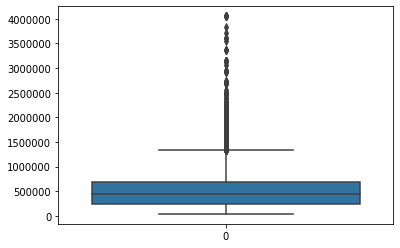

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,134133.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,12.061091,2.152665,2.052463,2.031521,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.267395,0.265474,1.899974,0.502130,185.839472,44.433090
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,11.944812,0.910682,0.509034,0.502737,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.916002,0.794056,1.869295,0.211062,381.588910,11.954493
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,21.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.000000,35.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.505998,7.000000,44.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,15.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.675053,16.000000,54.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,91.000000,20.000000,3.000000,3.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,27.000000,261.000000,25.000000,0.962693,1000.000000,70.000000


In [11]:
sns.boxplot(data= loan.AMT_GOODS_PRICE)
plt.show()
loan.describe()

#### We can replace the rows with null values in AMT_GOODS_PRICE column with the median value

In [12]:
#loan['AMT_GOODS_PRICE'] = loan['AMT_GOODS_PRICE'].fillna(loan['AMT_GOODS_PRICE'].median())

#### Finding the counts of null values in AMT_REQ_CREDIT_BUREAU_HOUR column

In [13]:
loan['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Checking for outliers in AMT_REQ_CREDIT_BUREAU_HOUR column

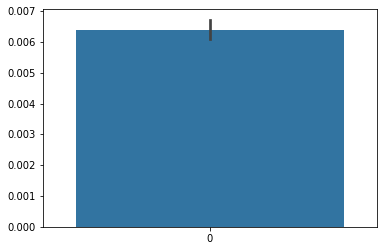

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,134133.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,12.061091,2.152665,2.052463,2.031521,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.267395,0.265474,1.899974,0.502130,185.839472,44.433090
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,11.944812,0.910682,0.509034,0.502737,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.916002,0.794056,1.869295,0.211062,381.588910,11.954493
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,21.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.000000,35.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.505998,7.000000,44.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,15.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.675053,16.000000,54.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,91.000000,20.000000,3.000000,3.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,27.000000,261.000000,25.000000,0.962693,1000.000000,70.000000


In [14]:
sns.barplot(data= loan.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()
loan.describe()

#### For AMT_REQ_CREDIT_BUREAU_HOUR we can fill the missing value with the mode as it significantly higher 

In [15]:
#loan['AMT_REQ_CREDIT_BUREAU_HOUR'] = loan['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(loan['AMT_GOODS_PRICE'].mode())

#### Finding the counts of null values in DEF_30_CNT_SOCIAL_CIRCLE column

In [16]:
loan['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### Checking for outliers in DEF_30_CNT_SOCIAL_CIRCLE column

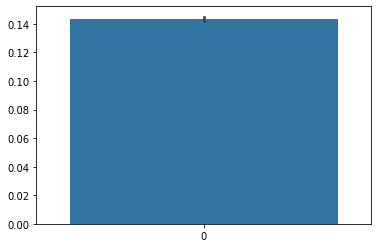

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,134133.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,12.061091,2.152665,2.052463,2.031521,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.267395,0.265474,1.899974,0.502130,185.839472,44.433090
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,11.944812,0.910682,0.509034,0.502737,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.916002,0.794056,1.869295,0.211062,381.588910,11.954493
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,21.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.000000,35.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.505998,7.000000,44.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,15.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.675053,16.000000,54.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,91.000000,20.000000,3.000000,3.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,27.000000,261.000000,25.000000,0.962693,1000.000000,70.000000


In [17]:
sns.barplot(data= loan.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()
loan.describe()

#### For DEF_30_CNT_SOCIAL_CIRCLE we can fill the missing value with the mode as it significantly higher 

In [18]:
#loan['DEF_30_CNT_SOCIAL_CIRCLE'] = loan['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(loan['DEF_30_CNT_SOCIAL_CIRCLE'].mode())

#### Checking for outliers in OBS_30_CNT_SOCIAL_CIRCLE column

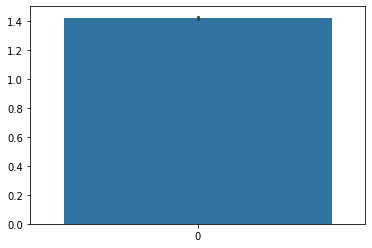

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,134133.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,12.061091,2.152665,2.052463,2.031521,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.267395,0.265474,1.899974,0.502130,185.839472,44.433090
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,11.944812,0.910682,0.509034,0.502737,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.916002,0.794056,1.869295,0.211062,381.588910,11.954493
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,21.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.000000,35.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.505998,7.000000,44.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,15.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.675053,16.000000,54.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,91.000000,20.000000,3.000000,3.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,27.000000,261.000000,25.000000,0.962693,1000.000000,70.000000


In [19]:
sns.barplot(data= loan.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()
loan.describe()

#### Finding the counts of null values in OBS_30_CNT_SOCIAL_CIRCLE column

In [20]:
loan['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### We can replace the rows with null values in OBS_30_CNT_SOCIAL_CIRCLE column with the median/mean value since there are no outliers as such

In [21]:
#loan['OBS_30_CNT_SOCIAL_CIRCLE'] = loan['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(loan['OBS_30_CNT_SOCIAL_CIRCLE'].median())

#### Finding the counts of null values in NAME_TYPE_SUITE column

In [22]:

loan['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### We can replace the rows with null values in NAME_TYPE_SUITE column with Unaccompanied i.e., the Mode for this column  

In [23]:
#loan['OBS_30_CNT_SOCIAL_CIRCLE'] = loan['OBS_30_CNT_SOCIAL_CIRCLE'].fillna('Unaccompanied')

### Finding Outliers in Application Dataset

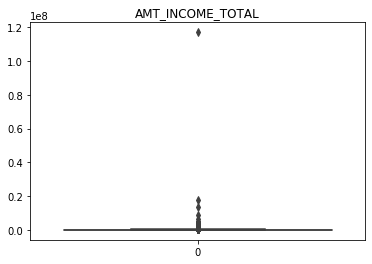

In [24]:
sns.boxplot(data= loan.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

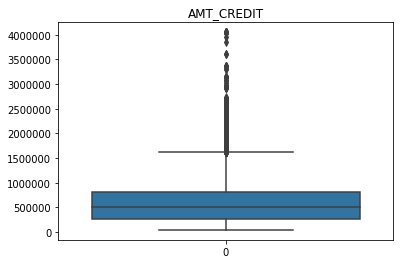

In [25]:
sns.boxplot(data= loan.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

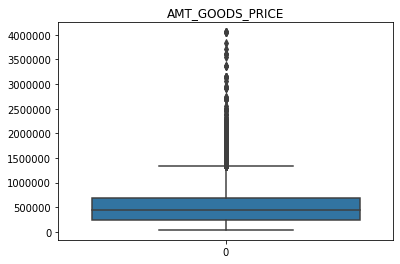

In [26]:
sns.boxplot(data= loan.AMT_GOODS_PRICE)
plt.title('AMT_GOODS_PRICE')
plt.show()

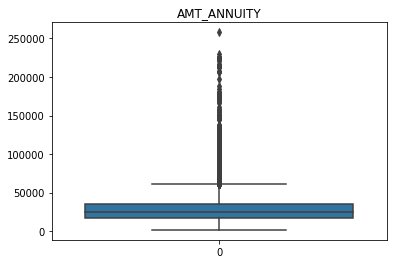

In [27]:
sns.boxplot(data= loan.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

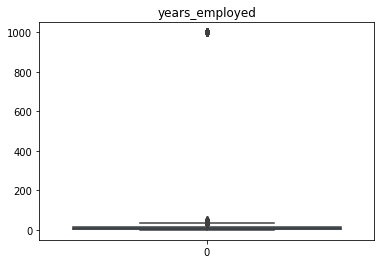

In [28]:
sns.boxplot(data= loan.years_employed)
plt.title('years_employed')
plt.show()

### Now we will do binning for two variables - AMT_INCOME_TOTAL and years_birth

#### Binning of AMT_INCOME_TOTAL

In [29]:
loan['INCOME'] = pd.cut(loan['AMT_INCOME_TOTAL'], bins = [29425.0, 150000.0, 300000, 402275.0, 482174.5, 700000], 
                        labels = ["low-income","lower-medium income", "higher-medium income", "high income", "very high income"])

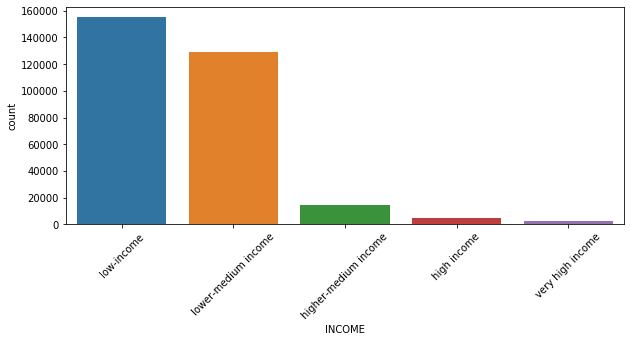

In [30]:
plt.figure(figsize = (10,4))
plt.xticks(rotation=45)
sns.countplot(loan['INCOME'])
plt.show()

Most of the clients have an income of less than 300000

#### Binning of years_birth

In [31]:
loan['Age'] = pd.cut(loan['years_birth'], bins = [20, 30, 40, 60, 70], 
                        labels = ["Young", "30s", "Middle Aged", "Aged"])

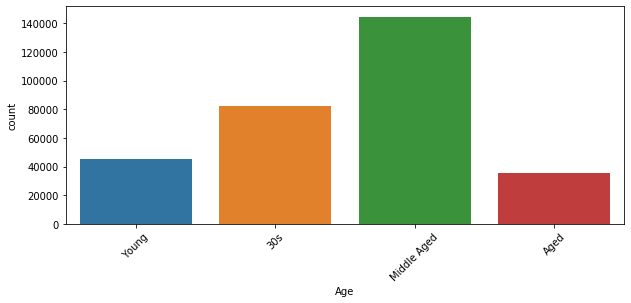

In [32]:
plt.figure(figsize = (10,4))
plt.xticks(rotation=45)
sns.countplot(loan['Age'])
plt.show()

Most of the clients  belong to Age-group 40-60

In [33]:
loan.groupby(['NAME_INCOME_TYPE']).agg({'years_employed': ['mean', 'median', 'count', 'max'], 'years_birth': ['median']})

years_employed                       years_birth
                               mean  median   count   max      median
NAME_INCOME_TYPE                                                     
Businessman                8.300000     7.0      10    15        48.0
Commercial associate       6.335912     5.0   71617    49        40.0
Maternity leave            7.800000     9.0       5    11        40.0
Pensioner                999.821918  1000.0   55362  1000        61.0
State servant              9.965258     8.0   21703    49        41.0
Student                    7.333333     5.5      18    22        37.5
Unemployed              1000.000000  1000.0      22  1000        46.0
Working                    6.948568     5.0  158774    50        40.0

We see that Pensioners comprise a lot of non-working people, which is normal. Working people seemed to have worked for many years.

In [34]:
loan.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL  \
                                                               mean   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate    274688.372093   
                              Pensioner               203919.230769   
                              State servant           258847.826087   
                              Working                 226312.500000   
Higher education              Businessman             652500.000000   
                              Commercial associate    242283.998486   
                              Maternity leave         195000.000000   
                              Pensioner               171455.114974   
                              State servant           207116.161080   
                              Student                 231000.000000   
                              Unemployed              189000.000000   
                              Working                 194013.110125   
Incomplete higher             Commercial associate    206232.296029   
                              Pensioner               149437.155405   
                              State servant           173589.989610   
                              Student                 157500.000000   
                              Unemployed              126000.000000   
                              Working                 170659.490600   
Lower secondary               Commercial associate    168173.628261   
                              Pensioner               106468.010464   
                              State servant           143250.000000   
                              Working                 140070.652174   
Secondary / secondary special Commercial associate    181368.704601   
                              Maternity leave          58500.000000   
                              Pensioner               130863.482560   
                              State servant           159979.349061   
                              Student                 138681.818182   
                              Unemployed               70753.846154   
                              Working                 154261.801730   

                                                                       \
                                                       median   count   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                          
Academic degree               Commercial associate  247500.00      43   
                              Pensioner             155700.00      26   
                              State servant         225000.00      23   
                              Working               202500.00      72   
Higher education              Businessman           495000.00      10   
                              Commercial associate  202500.00   24025   
                              Maternity leave       135000.00       3   
                              Pensioner             148500.00    8188   
                              State servant         180000.00    8863   
                              Student               175500.00       6   
                              Unemployed            180000.00       6   
                              Working               174134.25   33762   
Incomplete higher             Commercial associate  180000.00    3400   
                              Pensioner             135000.00     518   
                              State servant         157500.00     770   
                              Student               157500.00       1   
                              Unemployed             63000.00       3   
                              Working               157500.00    5585   
Lower secondary               Commercial associate  144000.00     460   
                              Pensioner              90000.00    1529   
                              State servant         119250.00     102   
                          

We can see that most of the loans are taken by working people with secondary education.

## Data  Imbalance

#### We use normalize = true and multiply by 100 so as to get the percentage of '0' and '1' in TARGET

In [40]:
Proportion = 100*loan['Defaulting_Prob'].value_counts(normalize=True)
Proportion

Non-Defaulter    91.927118
Defaulter         8.072882
Name: Defaulting_Prob, dtype: float64

In [44]:
Defaulters=loan[loan.TARGET==1]
Non_defaulters=loan[loan.TARGET==0]

percentage_defaulters=(len(Defaulters)*100)/len(loan)
percentage_nondefaulters=(len(Non_defaulters)*100)/len(loan)

In [47]:
print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(Non_defaulters)/len(Defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


### Plotting a graph for Defaulters vs Non-Defaulters

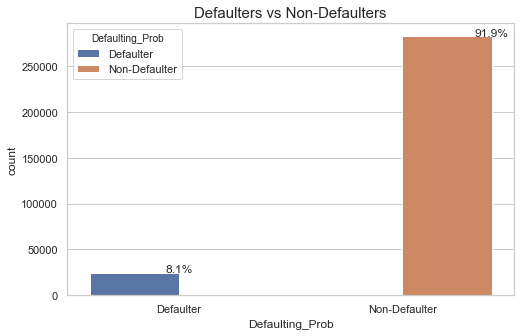

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(loan))
ax = sns.countplot(x="Defaulting_Prob", hue="Defaulting_Prob", data=loan)
plt.title('Defaulters vs Non-Defaulters', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## Correlation

In [49]:
loan_corr = loan
loan_corr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,years_employed,years_birth,Defaulting_Prob,INCOME,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,NaN,Laborers,1.0,2,2,Business Entity Type 3,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,1.0,0.083037,2,26,Defaulter,lower-medium income,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,NaN,Core staff,2.0,1,1,School,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.311267,4,46,Non-Defaulter,lower-medium income,Middle Aged
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,26.0,Laborers,1.0,2,2,Government,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,NaN,1,53,Non-Defaulter,low-income,Middle Aged
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,NaN,Laborers,2.0,2,2,Business Entity Type 3,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,9,53,Non-Defaulter,low-income,Middle Aged
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,NaN,Core staff,1.0,2,2,Religion,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,NaN,9,55,Non-Defaulter,low-income,Middle Aged


In [50]:
new_cols = ['Defaulting_Prob','TARGET','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_CHILDREN','TARGET','years_employed','years_birth','EXT_SOURCE_1']

In [51]:
#We are taking a new dataframe loan_corr only with limited columns that we will use in finding Correlation matrix
loan_corr = loan_corr.loc[:,new_cols]
loan_corr

,Defaulting_Prob,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET,years_employed,years_birth,EXT_SOURCE_1
0,Defaulter,1,24700.5,406597.5,351000.0,202500.0,0,1,2,26,0.083037
1,Non-Defaulter,0,35698.5,1293502.5,1129500.0,270000.0,0,0,4,46,0.311267
2,Non-Defaulter,0,6750.0,135000.0,135000.0,67500.0,0,0,1,53,NaN
3,Non-Defaulter,0,29686.5,312682.5,297000.0,135000.0,0,0,9,53,NaN
4,Non-Defaulter,0,21865.5,513000.0,513000.0,121500.0,0,0,9,55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307506,Non-Defaulter,0,27558.0,254700.0,225000.0,157500.0,0,0,1,26,0.145570
307507,Non-Defaulter,0,12001.5,269550.0,225000.0,72000.0,0,0,1000,57,NaN
307508,Non-Defaulter,0,29979.0,677664.0,585000.0,153000.0,0,0,22,42,0.744026
307509,Defaulter,1,20205.0,370107.0,319500.0,171000.0,0,1,14,33,NaN


In [52]:
# Here, we are splitting the dataframe based on Defaulter and Non-Defaulter to use later on
loan_corr_0 = loan_corr[loan_corr['Defaulting_Prob']=='Non-Defaulter']
loan_corr_1 = loan_corr[loan_corr['Defaulting_Prob']=='Defaulter']

In [53]:
loan_corr_1.head()

,Defaulting_Prob,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,TARGET,years_employed,years_birth,EXT_SOURCE_1
0,Defaulter,1,24700.5,406597.5,351000.0,202500.0,0,1,2,26,0.083037
26,Defaulter,1,27076.5,979992.0,702000.0,112500.0,0,1,8,52,NaN
40,Defaulter,1,35028.0,1193580.0,855000.0,202500.0,0,1,4,48,NaN
42,Defaulter,1,16258.5,288873.0,238500.0,135000.0,0,1,10,37,0.468208
81,Defaulter,1,14593.5,252000.0,252000.0,81000.0,0,1,1000,68,NaN


## Correlation Metrics: Plotting a heatmap for factors influencing a Non-Defaulter's behaviour

In [54]:
dummies=loan_corr_0.select_dtypes(include=['object']).columns.values
loan_corr_0=pd.get_dummies(loan_corr_0, columns=dummies,drop_first=True)

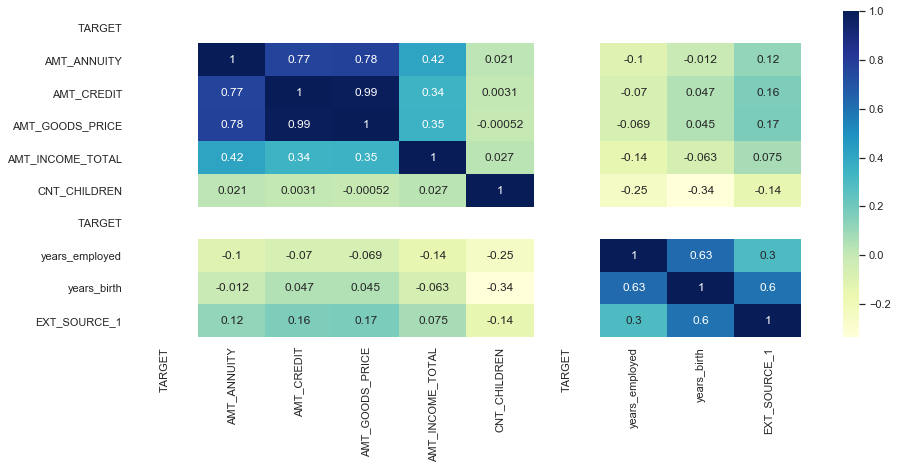

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_corr_0.corr(),cmap="YlGnBu", annot = True)
plt.show()

## Correlation Metrics: Plotting a heatmap for factors influencing a Defaulter's behaviour

In [56]:
dummies=loan_corr_1.select_dtypes(include=['object']).columns.values
loan_corr_1=pd.get_dummies(loan_corr_1, columns=dummies,drop_first=True)

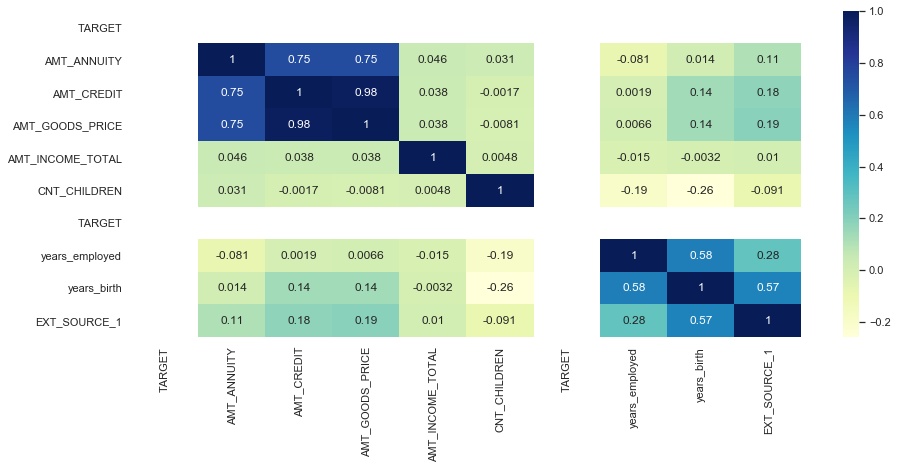

In [57]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_corr_1.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Finding the correlation in a pivot table by eliminating the duplicate and taking the absolute

In [59]:
corr = loan_corr_0.corr()

corr_loan = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_loan = corr_loan.unstack().reset_index().dropna(subset = [0]).sort_values(by=0, ascending = False)
corr_loan.columns = ['Var1','Var2','Correlation Value']
corr_loan['Corr_Abs'] = abs(corr_loan['Correlation Value'])
corr_loan.sort_values(by = "Corr_Abs", ascending = False)
corr_loan

,Var1,Var2,Correlation Value,Corr_Abs
32,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
21,AMT_CREDIT,AMT_ANNUITY,0.771309,0.771309
87,years_birth,years_employed,0.626041,0.626041
98,EXT_SOURCE_1,years_birth,0.601047,0.601047
41,AMT_INCOME_TOTAL,AMT_ANNUITY,0.418953,0.418953
43,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349462,0.349462
42,AMT_INCOME_TOTAL,AMT_CREDIT,0.342799,0.342799
97,EXT_SOURCE_1,years_employed,0.298974,0.298974
93,EXT_SOURCE_1,AMT_GOODS_PRICE,0.170520,0.170520


In [60]:
corr = loan_corr_1.corr()

corr_loan = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_loan = corr_loan.unstack().reset_index().dropna(subset = [0]).sort_values(by=0, ascending = False)
corr_loan.columns = ['Var1','Var2','Correlation Value']
corr_loan['Corr_Abs'] = abs(corr_loan['Correlation Value'])
corr_loan.sort_values(by = "Corr_Abs", ascending = False)
corr_loan

,Var1,Var2,Correlation Value,Corr_Abs
32,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
21,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
87,years_birth,years_employed,0.582446,0.582446
98,EXT_SOURCE_1,years_birth,0.569772,0.569772
97,EXT_SOURCE_1,years_employed,0.283777,0.283777
93,EXT_SOURCE_1,AMT_GOODS_PRICE,0.188550,0.188550
92,EXT_SOURCE_1,AMT_CREDIT,0.181461,0.181461
83,years_birth,AMT_GOODS_PRICE,0.135578,0.135578
82,years_birth,AMT_CREDIT,0.135044,0.135044


In [65]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=Defaulters[var], data=Defaulters, order= Defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=Non_defaulters[var], data=Non_defaulters, order= Non_defaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()


In [94]:
Defaulters.loc[:,'Rating1']=pd.cut(loan.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
Non_defaulters.loc[:,'Rating1']=pd.cut(loan.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\Mpadhy\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


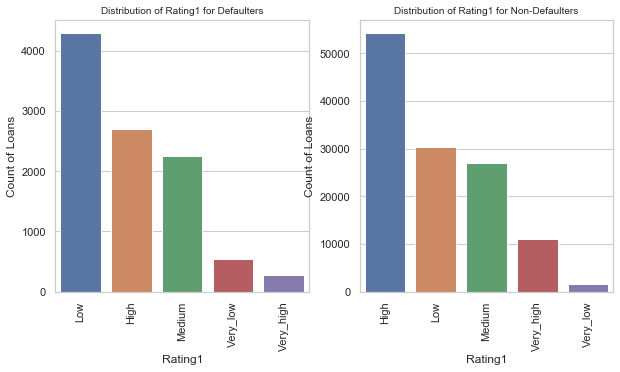

In [95]:
plot_charts('Rating1', label_rotation=True,horizontal_layout=True)

A large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

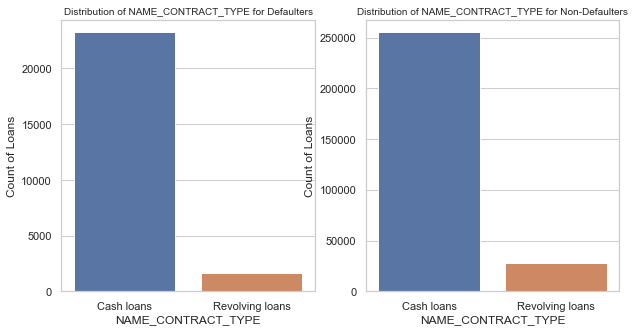

In [72]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

Cash loans are the most common type of loan

## Univariate and Bivariate Analysis

### Univariate - Continuous variable analysis - using distplot for AMT_CREDIT

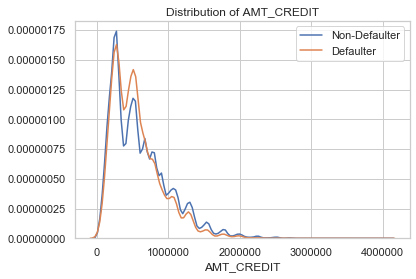

In [73]:
plt.title('Distribution of AMT_CREDIT')
sns.distplot(loan_corr_0['AMT_CREDIT'], hist =False, label = 'Non-Defaulter')
sns.distplot(loan_corr_1['AMT_CREDIT'], hist =False, label = 'Defaulter')
plt.show()

### Univariate - Continuous variable analysis - using boxplot for AMT_ANNUITY

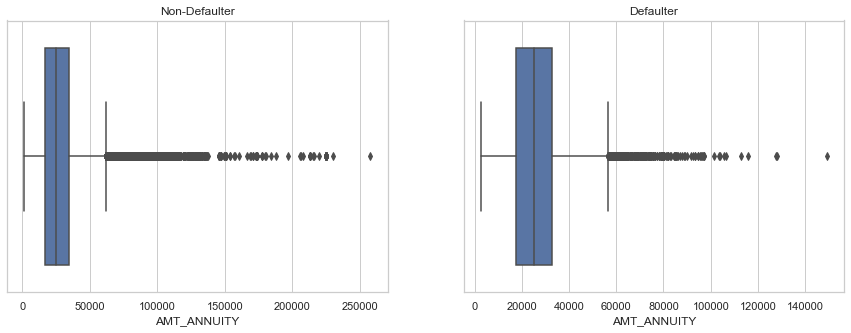

In [74]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
sns.boxplot(loan_corr_0['AMT_ANNUITY'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
sns.boxplot(loan_corr_1['AMT_ANNUITY'])

plt.show()

Persons having AMT_Annuity between 18000 and 35000 have higher chance of being a defaulter

### Univariate - Categorical variable analysis

### Analysis - Based on REGION_RATING_CLIENT

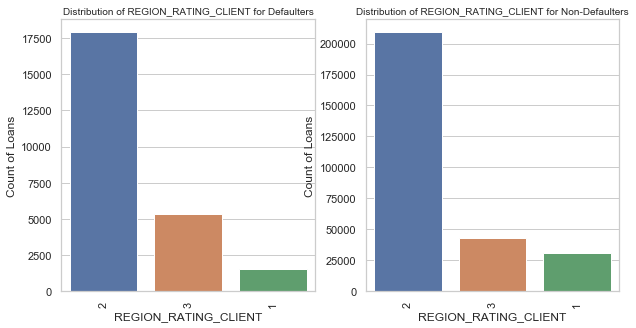

In [75]:
plot_charts('REGION_RATING_CLIENT', label_rotation=True,horizontal_layout=True)

### Analysis - Based on gender

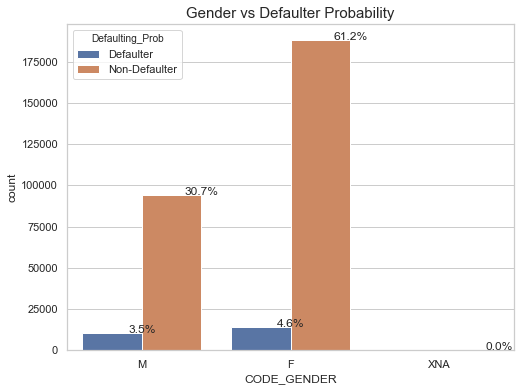

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
total = float(len(loan))
ax = sns.countplot(x="CODE_GENDER", hue="Defaulting_Prob", data=loan)
plt.title('Gender vs Defaulter Probability', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Females have a higher chance of being a defaulter

### Analysis - Based on own Car vs own Realty

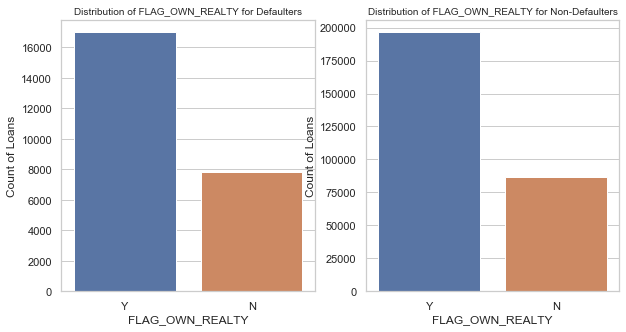

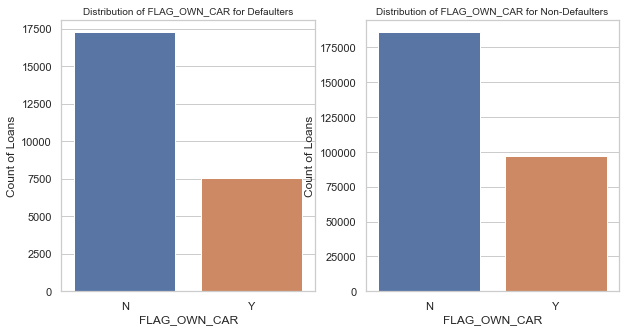

In [77]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

Persons having own car but not own Realty have a higher chance of being a Defaulter

### Analysis - Based on NAME_HOUSING_TYPE

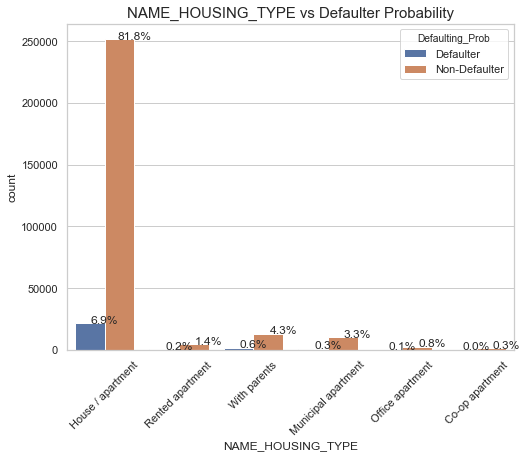

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
total = float(len(loan))
ax = sns.countplot(x="NAME_HOUSING_TYPE", hue="Defaulting_Prob", data=loan)
plt.xticks(rotation=45)
plt.title('NAME_HOUSING_TYPE vs Defaulter Probability', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Analysis - Based on No. of children and NAME_HOUSING_TYPE

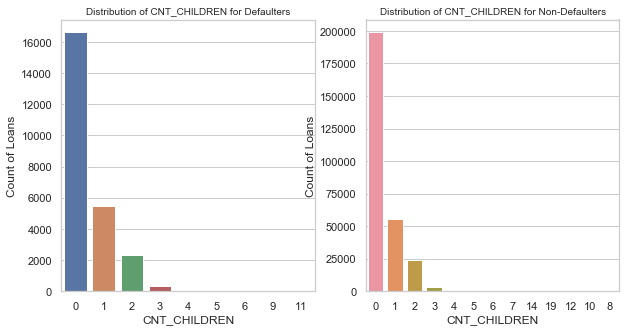

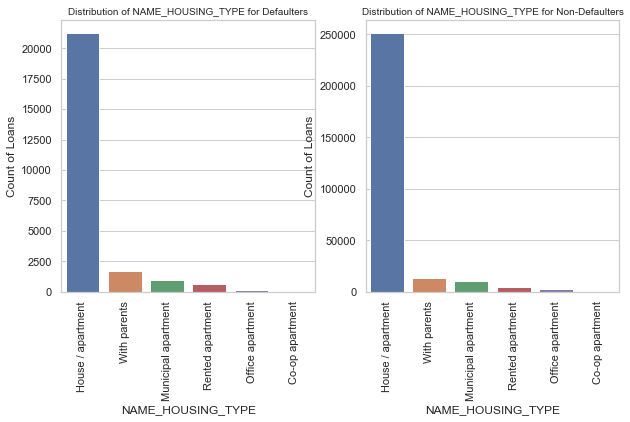

In [79]:
plot_charts('CNT_CHILDREN', label_rotation=False,horizontal_layout=True)
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

### Analysis - Based on Gender and NAME_HOUSING_Type

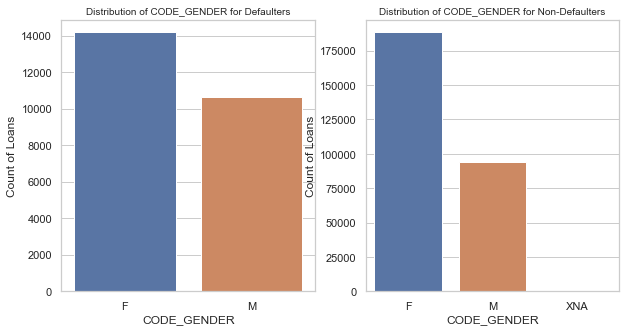

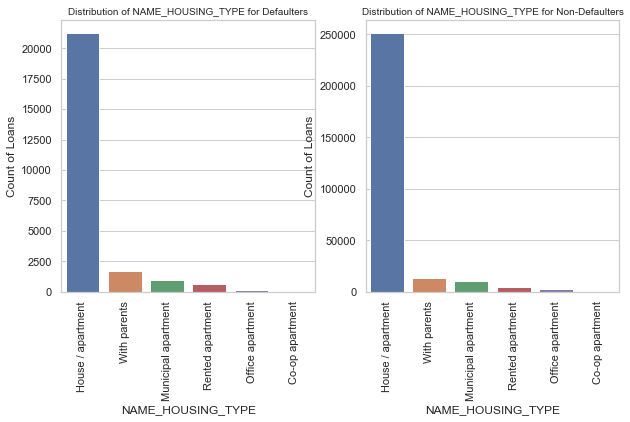

In [80]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

From the above analysis, we can conclude that Persons living in a house/apartment and having no children have a higher chance of taking a loan

### Analysis - Based on Income and Gender

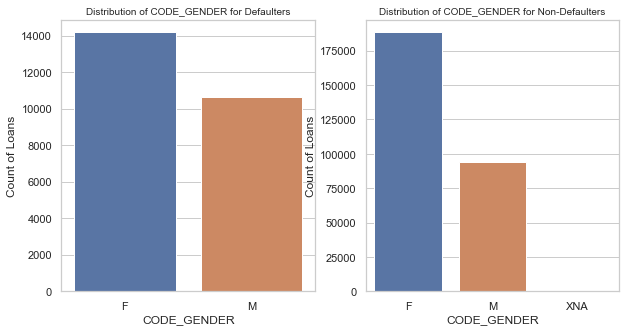

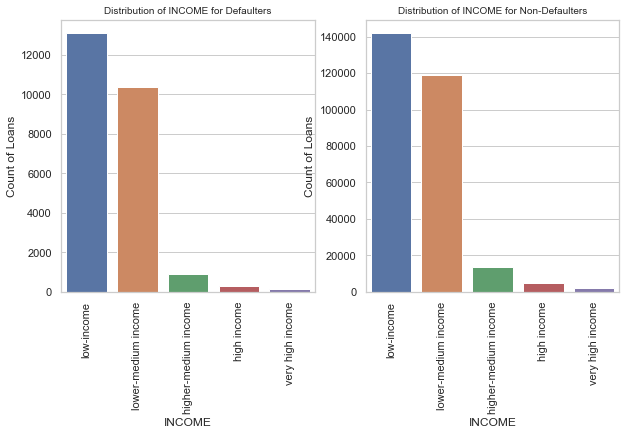

In [81]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)
plot_charts('INCOME', label_rotation=True,horizontal_layout=True)

Females take more loan than males in general and have a higher chance of being a defaulter

## Bivariate - Continuous Categorical variable analysis

### Analysis - Based on Employment term

In [82]:
loan['years_employed_bin'] = pd.cut(loan['years_employed'], bins = [1, 4, 8, 12, 15, 20, 22], 
                        labels = ["1-4", "4-8", "9-12", "13-15", "18-20", "22"])

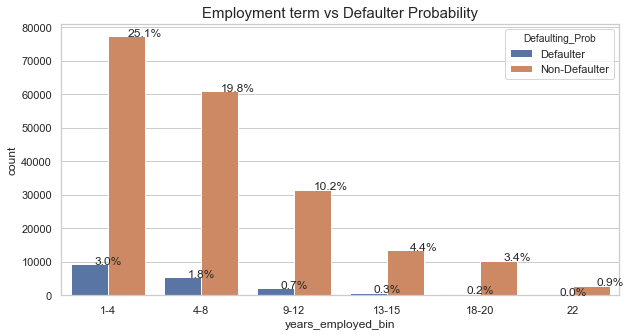

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(loan))
ax = sns.countplot(x=loan['years_employed_bin'],hue=loan['Defaulting_Prob'],order=["1-4", "4-8", "9-12", "13-15", "18-20", "22"])
plt.title('Employment term vs Defaulter Probability', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [84]:
bi_cols = ['AMT_INCOME_TOTAL','INCOME','years_employed','years_birth','TARGET','AMT_CREDIT']

In [85]:
loan_bi = loan.loc[:,bi_cols]
loan_bi

,AMT_INCOME_TOTAL,INCOME,years_employed,years_birth,TARGET,AMT_CREDIT
0,202500.0,lower-medium income,2,26,1,406597.5
1,270000.0,lower-medium income,4,46,0,1293502.5
2,67500.0,low-income,1,53,0,135000.0
3,135000.0,low-income,9,53,0,312682.5
4,121500.0,low-income,9,55,0,513000.0
...,...,...,...,...,...,...
307506,157500.0,lower-medium income,1,26,0,254700.0
307507,72000.0,low-income,1000,57,0,269550.0
307508,153000.0,lower-medium income,22,42,0,677664.0
307509,171000.0,lower-medium income,14,33,1,370107.0


In [88]:
loan_bi_0 = loan_bi[loan_bi['TARGET']==0]
loan_bi_1 = loan_bi[loan_bi['TARGET']==1]

## Bivariate - Continuous Continuous variable analysis

### Analysis - Based on AMT_INCOME_TOTAL and AMT_CREDIT

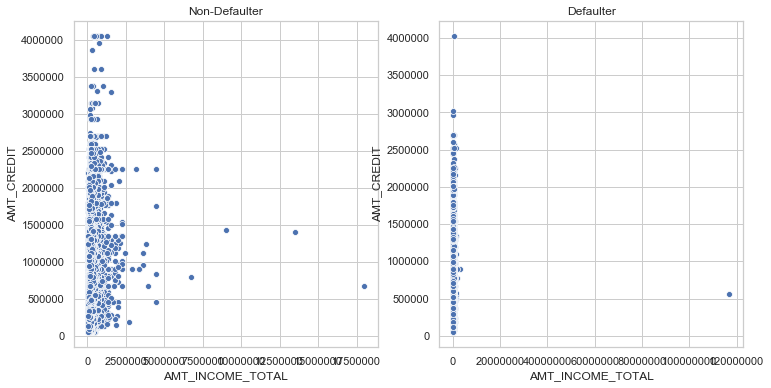

In [89]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Non-Defaulter")
sns.scatterplot(x = "AMT_INCOME_TOTAL",y = "AMT_CREDIT", data = loan_bi_0)
plt.ticklabel_format(useOffset=False,style='plain')


plt.subplot(1,2,2)
plt.title("Defaulter")
sns.scatterplot(x = "AMT_INCOME_TOTAL",y = "AMT_CREDIT", data = loan_bi_1)
plt.ticklabel_format(useOffset=False,style='plain')
plt.show()

### Analysis - Based on AMT_INCOME_TOTAL and years_birth

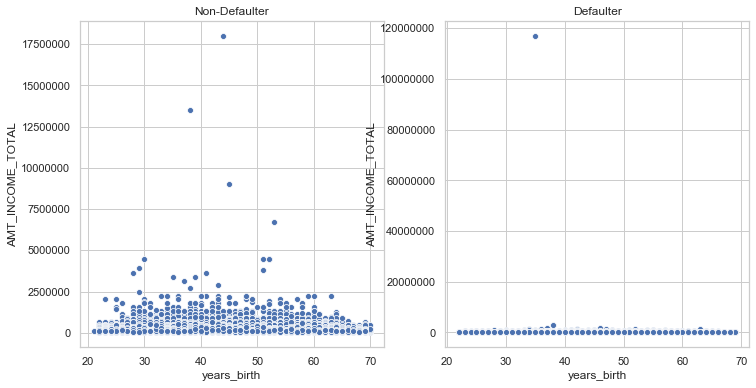

In [90]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Non-Defaulter")
sns.scatterplot(y = "AMT_INCOME_TOTAL",x = "years_birth", data = loan_bi_0)
plt.ticklabel_format(useOffset=False,style='plain')

plt.subplot(1,2,2)
plt.title("Defaulter")
sns.scatterplot(y = "AMT_INCOME_TOTAL",x = "years_birth", data = loan_bi_1)
plt.ticklabel_format(useOffset=False,style='plain')
plt.show()

### Analysis - Based on Education

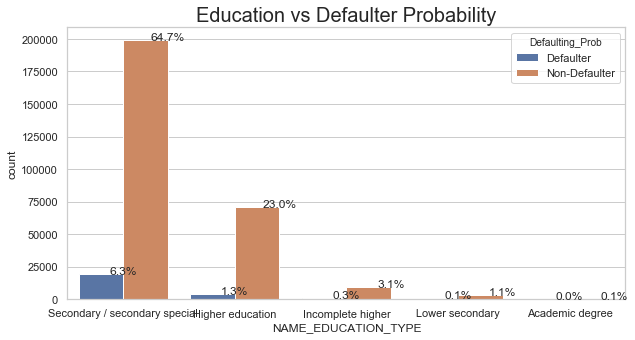

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(loan))
ax = sns.countplot(x=loan['NAME_EDUCATION_TYPE'],hue=loan['Defaulting_Prob'])
plt.title('Education vs Defaulter Probability', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.show()

Persons who have completed just secondary/secondary special have the highest chances of being a daefulater

### Analysis - Based on Family Status

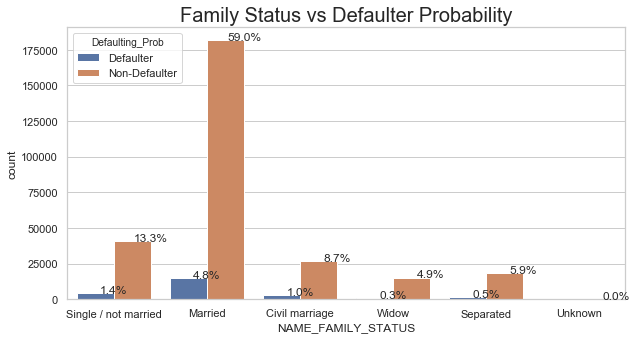

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = float(len(loan))
ax = sns.countplot(x=loan['NAME_FAMILY_STATUS'],hue=loan['Defaulting_Prob'])
plt.title('Family Status vs Defaulter Probability', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Married persons have the highest to take loan and have the highest chance of not defulting

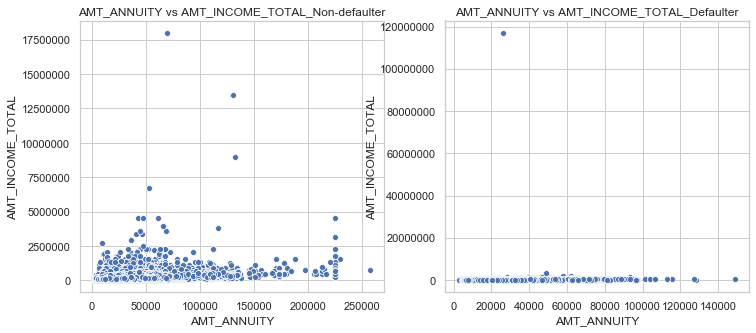

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("AMT_ANNUITY vs AMT_INCOME_TOTAL_Non-defaulter")
sns.scatterplot(x = 'AMT_ANNUITY',y = 'AMT_INCOME_TOTAL', data = loan_corr_0)
plt.ticklabel_format(useOffset=False,style='plain')

plt.subplot(1,2,2)
plt.title("AMT_ANNUITY vs AMT_INCOME_TOTAL_Defaulter")
sns.scatterplot(x = 'AMT_ANNUITY', y ='AMT_INCOME_TOTAL', data = loan_corr_1)
plt.ticklabel_format(useOffset=False,style='plain')

plt.show()


Observations:

By using the analysis from the above data, we able to finalize the following Driver variables which influenced the applicant behavior:
1.	AMT_ANUITY
2.	AMT_CREDIT
3.	AMT_GOODS_PRICE
4.	CNT_CHILDREN
5.	CNT_FAM_MEMBERS

Below is the relation between above factors in case of a default applicant:
•	Greater than 50% correlation: [‘AMT_ANUITY’, AMT_CREDIT’, ‘AMT_GOODS_PRICE’, ‘CNT_CHILDREN’,’CNT_FAM_MEMBERS]
•	Greater than 75% correlation: [ ‘AMT_CREDIT’, ‘AMT_GOODS_PRICE’, ‘CNT_CHILDREN’,’CNT_FAM_MEMBERS’]
•	Greater than 90% correlation: [ ‘AMT_CREDIT’, ‘AMT_GOODS_PRICE’]


RECOMMENDATIONS:

Few suggestions that the company can utilize for its portfolio and risk assessment. Company can take care while providing loans to the following risky loan applicants so that such loans can be reduced thereby cutting down the amount of credit loss. 

1. Education type is Secondary/Secondary Special
2. Applicants having an Annual income of less than 1.5 Lakhs
3. Applicants work Experience is less than 5 years
4. Applicants having low Rating1, Region_Rating_Client_W_City and Ext_Source rating
